In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
reload(plt)
import numpy as np
from cliff_walking import CliffWalkingEnv

In [2]:
from IPython.display import Image

In [3]:
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

In [4]:
def Q_to_eps_greedy_policy(Q, eps=0.1):
    num_actions = Q.shape[1]
    pi = np.zeros(Q.shape[0],)
    for i in range(0, Q.shape[0]):
        if np.random.uniform(0,1) < eps:
            # choose a random action
            pi[i] = np.random.randint(0, num_actions)
        else:
            # take the argmax of Q[s,.]
            pi[i] = np.argmax(Q[i])
    return pi

In [66]:
def Q_to_eps_greedy_policy_probs(Q, eps=0.1):
    num_actions = Q.shape[1]
    pi = np.zeros((Q.shape[0], num_actions))
    for i in range(0, Q.shape[0]):
        for j in range(0, num_actions):
            if np.argmax(Q[i]) == j:
                pi[i][j] = 1.0 - eps
            else:
                pi[i][j] = eps / (num_actions-1)
    return pi

------

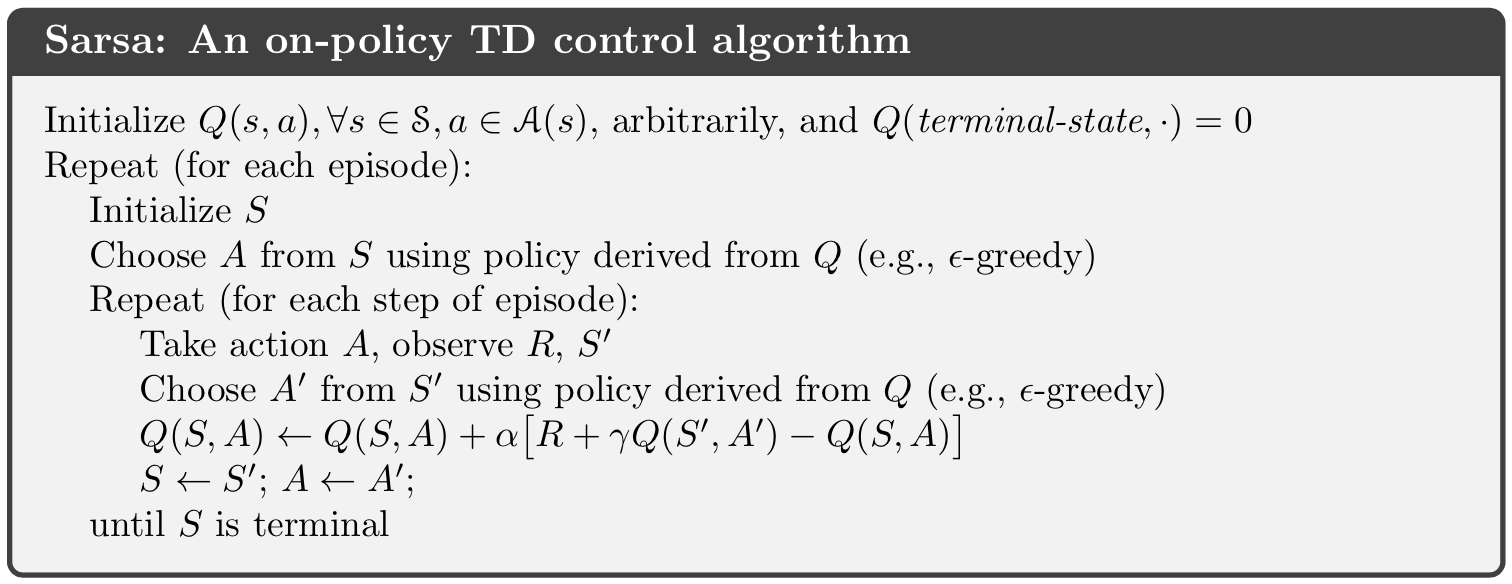

In [66]:
Image("./sarsa.png", width=800)

In [38]:
def avg_arr(arr):
    return np.sum(np.asarray(arr),axis=0) / len(arr)

In [6]:
def sarsa(env, num_iters, eps, alpha, gamma=1.0):
    """
    :env:
    :num_iters: number of episodes
    :eps: epsilon
    :win_state:
    """
    Q = np.zeros((env.nS, env.nA))
    # repeat (for each episode that wins)
    reward_sums = []
    eps_lengths = []
    for num_iter in range(num_iters):
        reward_sum = 0
        eps_length = 0
        env.reset()
        # initialise S
        S = env.s
        # choose A from S using policy derived from Q (e.g. eps-greedy)
        pi = Q_to_eps_greedy_policy(Q, eps)
        A = pi[S]
        # repeat, for each step of episode
        while True:
            # take action A, observe R, S'
            _, R, is_done, _ = env.step(A)
            eps_length += 1
            reward_sum += R
            S_prime = env.s
            # choose A' from S' using policy derived from Q (e.g. eps-greedy)
            pi = Q_to_eps_greedy_policy(Q, eps)
            A_prime = pi[S_prime]
            Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_prime]) - Q[S,A])
            S = S_prime
            A = A_prime
            if is_done:
                break
        #print "eps length:", eps_length
        reward_sums.append(reward_sum)
        eps_lengths.append(eps_length)
    return reward_sums, eps_lengths

In [48]:
env = CliffWalkingEnv()
arr1_sarsa, arr2_sarsa = [], []
for i in range(100):
    print i,
    reward_sums_sarsa, eps_lengths_sarsa = sarsa(env, num_iters=200, eps=0.1, alpha=0.5)
    arr1_sarsa.append(reward_sums_sarsa)
    arr2_sarsa.append(eps_lengths_sarsa)
arr1_sarsa = avg_arr(arr1_sarsa)
arr2_sarsa = avg_arr(arr2_sarsa)

0

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


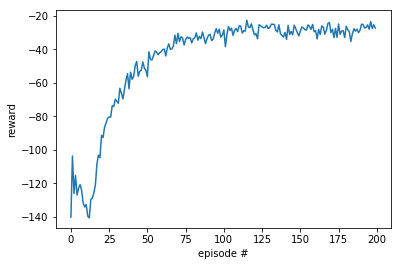

In [49]:
plt.plot(arr1_sarsa)
plt.xlabel("episode #")
plt.ylabel("reward")

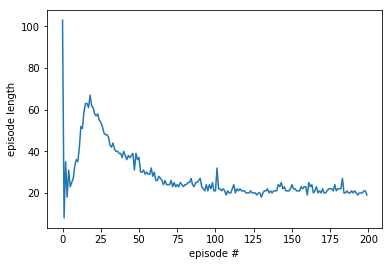

In [50]:
plt.plot(arr2_sarsa)
plt.xlabel("episode #")
plt.ylabel("episode length")

-----

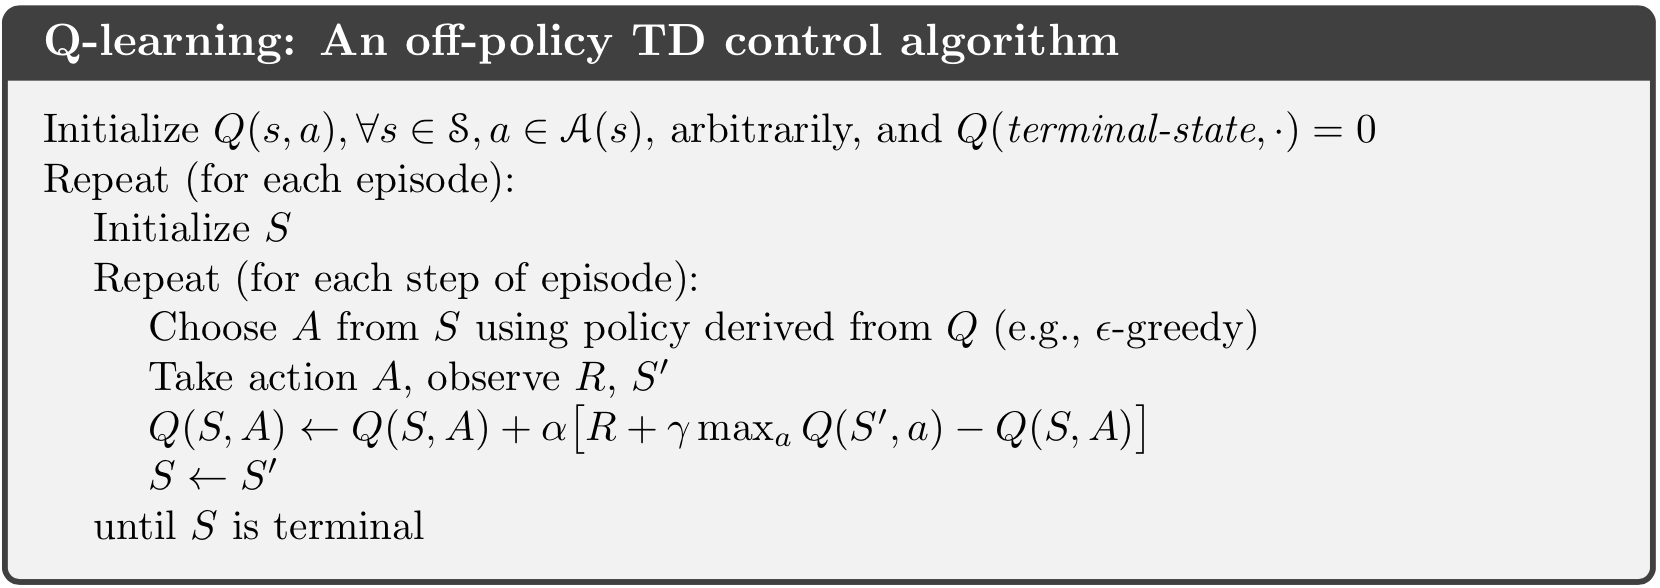

In [58]:
Image("./qlearning.png",width=800)

In [20]:
def q_learning(env, num_iters, eps, alpha, gamma=1.0):
    """
    :env:
    :num_iters: number of episodes
    :eps: epsilon
    :win_state:
    """
    Q = np.zeros((env.nS, env.nA))
    # repeat (for each episode that wins)
    reward_sums = []
    eps_lengths = []
    for num_iter in range(num_iters):
        eps_length = 0
        reward_sum = 0
        env.reset()
        # initialise S
        S = env.s
        # repeat, for each step of episode
        while True:
            # choose A from S using policy derived from Q (e.g. eps-greedy)
            pi = Q_to_eps_greedy_policy(Q)
            A = pi[S]
            # take action A, observe R, S'
            _, R, is_done, _ = env.step(A)
            reward_sum += R
            eps_length += 1
            S_prime = env.s
            # we want to find argmax_a Q[S_prime, a]
            Q_as = []
            for a in range(env.nA):
                Q_as.append(Q[S_prime,a])
            A_max = np.argmax(Q_as)
            Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_max]) - Q[S,A])
            S = S_prime
            eps_length += 1
            if is_done:
                break
        #print "eps length:", eps_length
        reward_sums.append(reward_sum)
        eps_lengths.append(eps_length)
    return reward_sums, eps_lengths

In [51]:
env = CliffWalkingEnv()
arr1_ql, arr2_ql = [], []
for i in range(100):
    print i,
    reward_sums_ql, eps_lengths_ql = q_learning(env, num_iters=200, eps=0.1, alpha=0.5)
    arr1_ql.append(reward_sums_ql)
    arr2_ql.append(eps_lengths_ql)
arr1_ql = avg_arr(arr1_ql)
arr2_ql = avg_arr(arr2_ql)

0

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


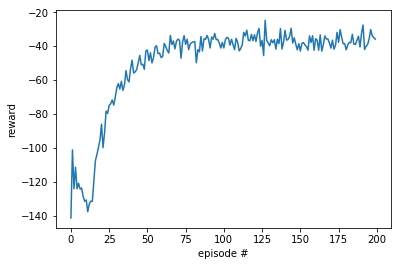

In [52]:
plt.plot(arr1_ql)
plt.xlabel("episode #")
plt.ylabel("reward")

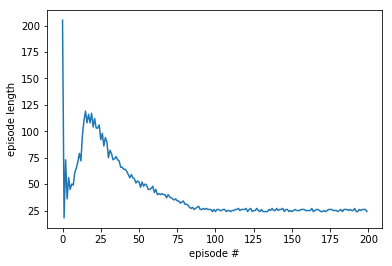

In [53]:
plt.plot(arr2_ql)
plt.xlabel("episode #")
plt.ylabel("episode length")

-------

"After an initial transient, Q-learning learns values for the optimal policy, that which travels right along the edge of the cliff. Unfortunately, this results in its occasionally falling off the cliff because of the eps-greedy action selection."

Plot seems to corroborate this: Q-learning finds the optimal policy at the risk of falling off the cliff, so its average reward is lower (more negative)

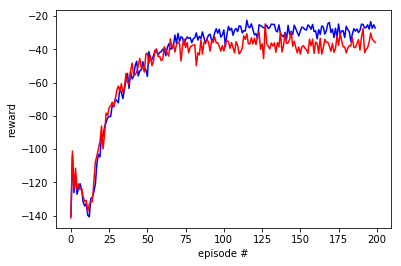

In [56]:
plt.plot(arr1_sarsa, 'b', arr1_ql, 'r')
plt.xlabel("episode #")
plt.ylabel("reward")

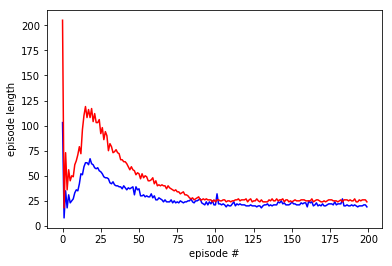

In [55]:
plt.plot(arr2_sarsa, 'b', arr2_ql, 'r')
plt.xlabel("episode #")
plt.ylabel("episode length")

----

In [68]:
def expected_sarsa(env, num_iters, eps, alpha, gamma=1.0):
    """
    :env:
    :num_iters: number of episodes
    :eps: epsilon
    :win_state:
    """
    Q = np.zeros((env.nS, env.nA))
    # repeat (for each episode that wins)
    reward_sums = []
    eps_lengths = []
    for num_iter in range(num_iters):
        eps_length = 0
        reward_sum = 0
        env.reset()
        # initialise S
        S = env.s
        # repeat, for each step of episode
        while True:
            # choose A from S using policy derived from Q (e.g. eps-greedy)
            pi = Q_to_eps_greedy_policy(Q)
            A = pi[S]
            # take action A, observe R, S'
            _, R, is_done, _ = env.step(A)
            reward_sum += R
            eps_length += 1
            S_prime = env.s
            # we want to find argmax_a Q[S_prime, a]
            pi_probs = Q_to_eps_greedy_policy_probs(Q)
            exp_term  = np.dot(pi_probs[S_prime],Q[S_prime])
            Q[S,A] = Q[S,A] + alpha*(R + (gamma*exp_term) - Q[S,A])
            S = S_prime
            eps_length += 1
            if is_done:
                break
        #print "eps length:", eps_length
        reward_sums.append(reward_sum)
        eps_lengths.append(eps_length)
    return reward_sums, eps_lengths

In [70]:
env = CliffWalkingEnv()
reward_sums_es, eps_lengths_es = expected_sarsa(env, num_iters=200, eps=0.1, alpha=0.5)

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [72]:
env = CliffWalkingEnv()
arr1_es, arr2_es = [], []
for i in range(100):
    print i,
    reward_sums_es, eps_lengths_es = expected_sarsa(env, num_iters=200, eps=0.1, alpha=0.5)
    arr1_es.append(reward_sums_es)
    arr2_es.append(eps_lengths_es)
arr1_es = avg_arr(arr1_es)
arr2_es = avg_arr(arr2_es)

0

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


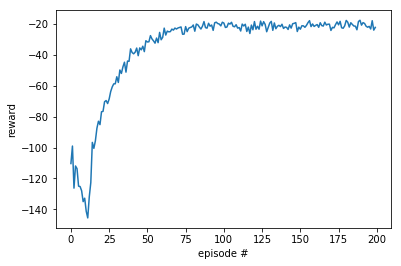

In [73]:
plt.plot(arr1_es)
plt.xlabel("episode #")
plt.ylabel("reward")

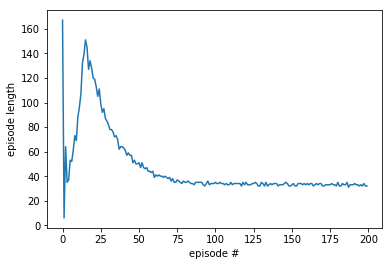

In [74]:
plt.plot(arr2_es)
plt.xlabel("episode #")
plt.ylabel("episode length")

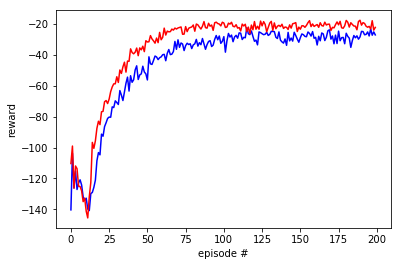

In [75]:
plt.plot(arr1_sarsa, 'b', arr1_es, 'r')
plt.xlabel("episode #")
plt.ylabel("reward")

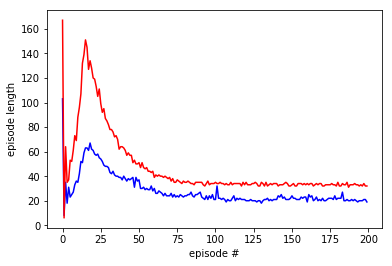

In [76]:
plt.plot(arr2_sarsa, 'b', arr2_es, 'r')
plt.xlabel("episode #")
plt.ylabel("episode length")

Looks like blue (sarsa) falls off more often and gets lower reward and therefore shorter episode length